In [1]:
""" Data Visualization from Extraction Transformation and Loading (ETL) Process"""

' Data Visualization from Extraction Transformation and Loading (ETL) Process'

In [3]:
import pandas as pd

oracle_df = pd.read_csv('large_oracle_data.csv')
sql_df = pd.read_csv('large_sql_data.csv')
sales_df = pd.read_excel('large_sales_data.xlsx')

cols = oracle_df.columns
data = [oracle_df, sql_df, sales_df]

oracle_df.head(), sql_df.head(), sales_df.head()

(   order_id  order_date product_category  sales
 0      2001  2024-09-01         Clothing    961
 1      2002  2024-09-02         Clothing    998
 2      2003  2024-09-03         Clothing    689
 3      2004  2024-09-04       Appliances    454
 4      2005  2024-09-05       Appliances    508,
    order_id  order_date product_category  sales
 0      1001  2024-05-01       Appliances    837
 1      1002  2024-05-02        Furniture    935
 2      1003  2024-05-03        Furniture    309
 3      1004  2024-05-04        Furniture    190
 4      1005  2024-05-05             Toys    985,
    order_id order_date product_category  sales
 0         1 2024-01-01             Toys    743
 1         2 2024-01-02         Clothing    333
 2         3 2024-01-03       Appliances    607
 3         4 2024-01-04             Toys    139
 4         5 2024-01-05             Toys    465)

In [4]:
# Transformation

pd.DataFrame({'oracle_df':oracle_df.isna().sum().values,
          'sql_df':sql_df.isna().sum().values,
          'sales_df':sales_df.isna().sum().values},index=oracle_df.columns)

,oracle_df,sql_df,sales_df
order_id,0,0,0
order_date,0,0,0
product_category,0,0,0
sales,0,0,0


In [5]:
# Filtering

for df in data:
    df.drop('order_id',axis=1,inplace=True)

In [6]:
for df in data:
    print(df.head(),'\n\n')

   order_date product_category  sales
0  2024-09-01         Clothing    961
1  2024-09-02         Clothing    998
2  2024-09-03         Clothing    689
3  2024-09-04       Appliances    454
4  2024-09-05       Appliances    508 


   order_date product_category  sales
0  2024-05-01       Appliances    837
1  2024-05-02        Furniture    935
2  2024-05-03        Furniture    309
3  2024-05-04        Furniture    190
4  2024-05-05             Toys    985 


  order_date product_category  sales
0 2024-01-01             Toys    743
1 2024-01-02         Clothing    333
2 2024-01-03       Appliances    607
3 2024-01-04             Toys    139
4 2024-01-05             Toys    465 




In [7]:
# Aggrigating 

aggregate_data = []

for df in data:
    aggregate_data.append(df.drop('order_date',axis=1).groupby(by='product_category').sum())

for df in aggregate_data:
    print(df.head(),'\n\n')

                   sales
product_category        
Appliances        108585
Clothing          111543
Electronics       102196
Furniture         119501
Toys              119428 


                   sales
product_category        
Appliances        119043
Clothing          107451
Electronics       110935
Furniture         109847
Toys              114767 


                   sales
product_category        
Appliances        107710
Clothing           96096
Electronics       100432
Furniture         117269
Toys              108232 




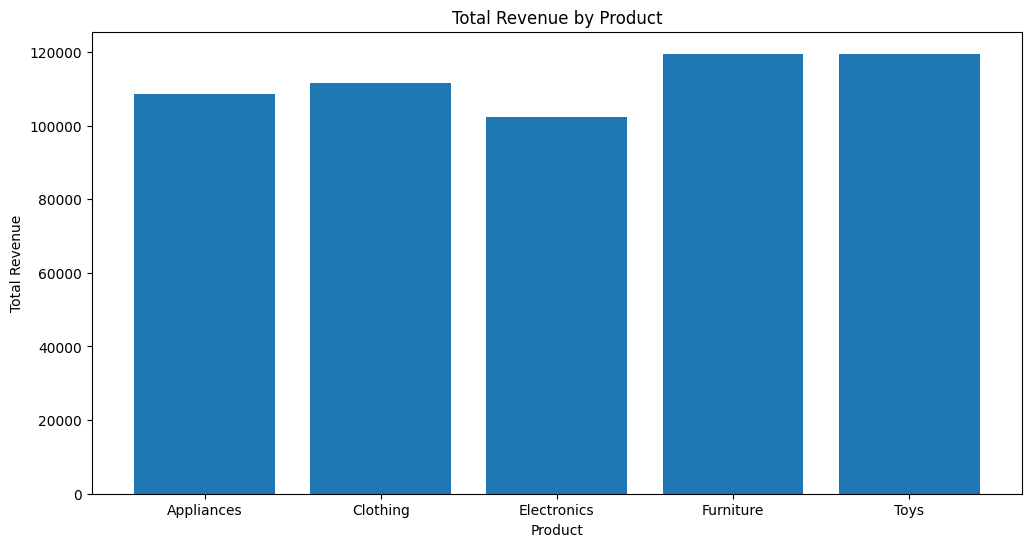

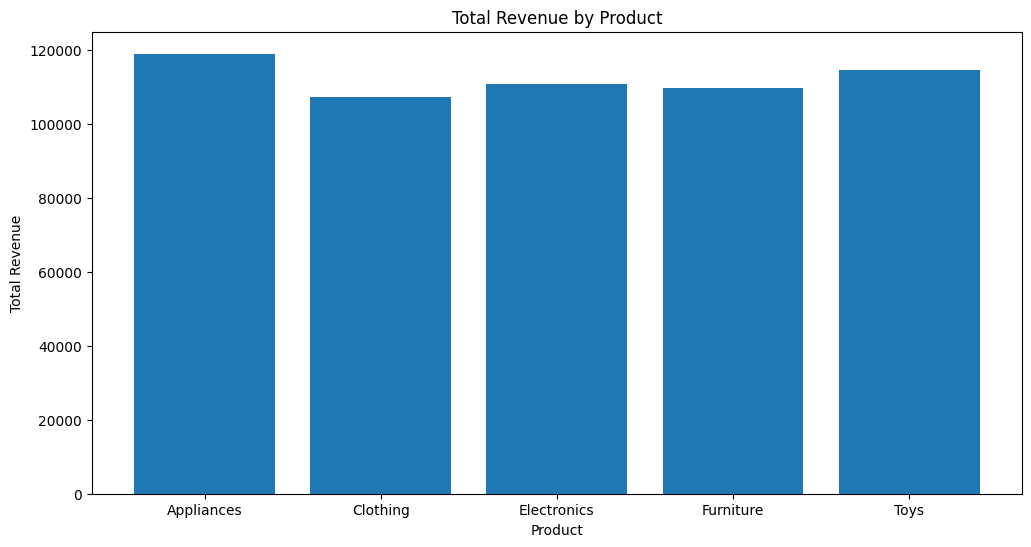

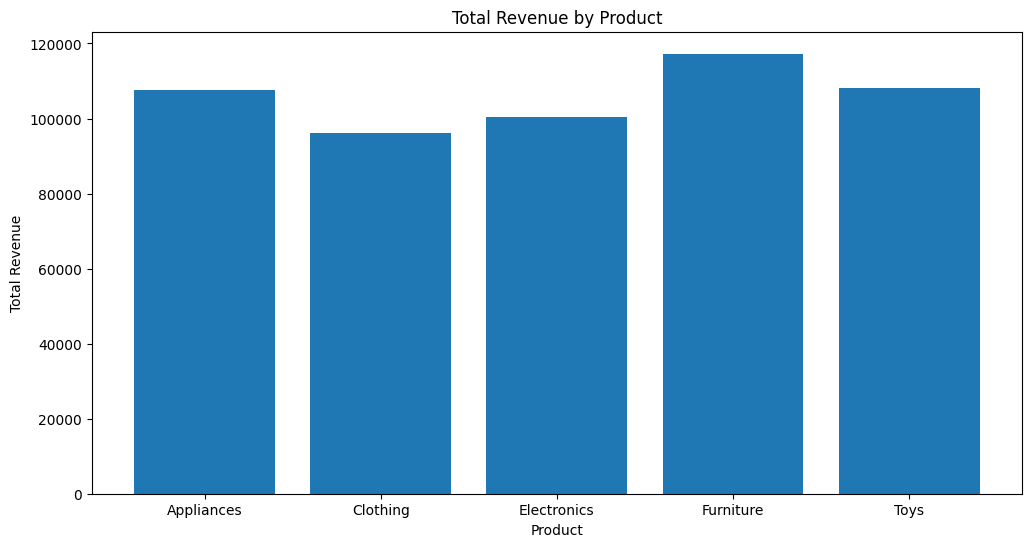

In [8]:
import matplotlib.pyplot as plt

categories = aggregate_data[0].index.to_list()

def plot_aggreagate_data(df, categories):
    plt.figure(figsize=(12, 6))
    plt.bar(x=categories,height=df.values.ravel())
    plt.title('Total Revenue by Product')
    plt.xlabel('Product')
    plt.ylabel('Total Revenue')

for df in aggregate_data:
    plot_aggreagate_data(df, categories)